In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [3]:
temp.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
temp.shape

(3650, 2)

<function matplotlib.pyplot.show(*args, **kw)>

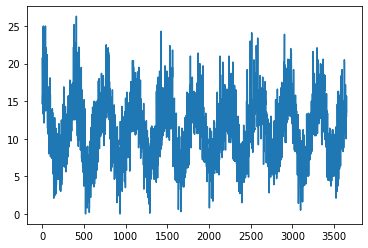

In [5]:
plt.plot(temp.Temp)
plt.show

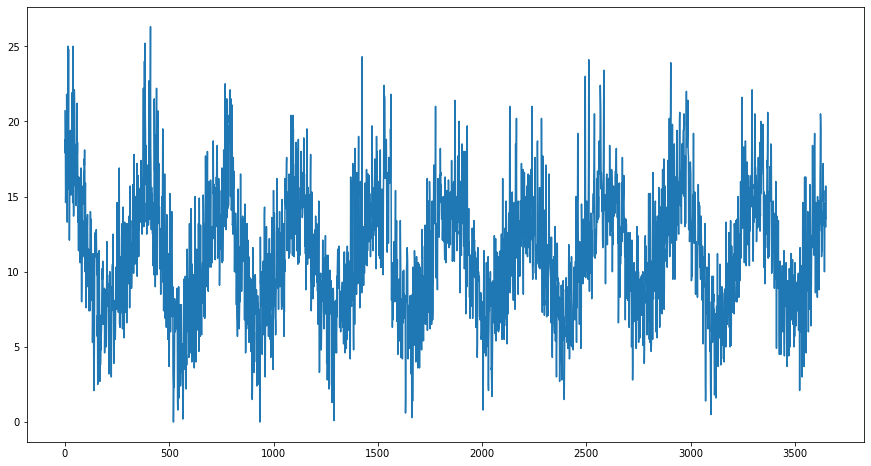

In [6]:
plt.figure(figsize=(15,8))
plt.plot(temp.Temp)
plt.show()

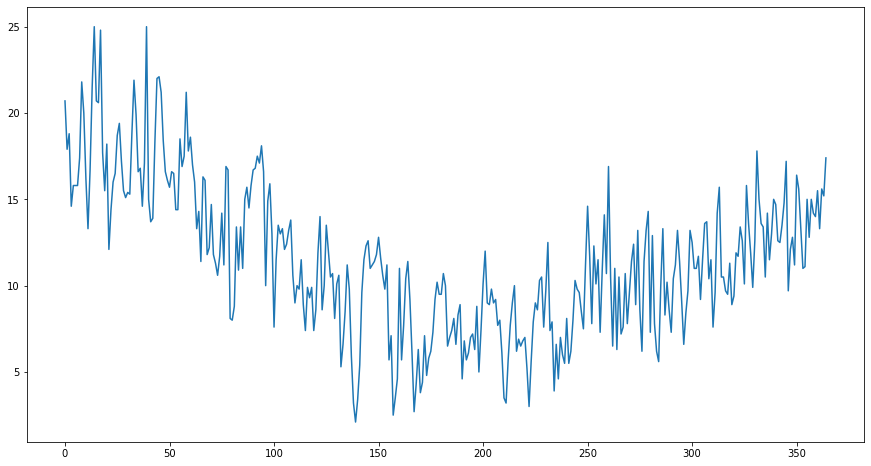

In [7]:
plt.figure(figsize=(15,8))
plt.plot(temp.Temp[:365])
plt.show()

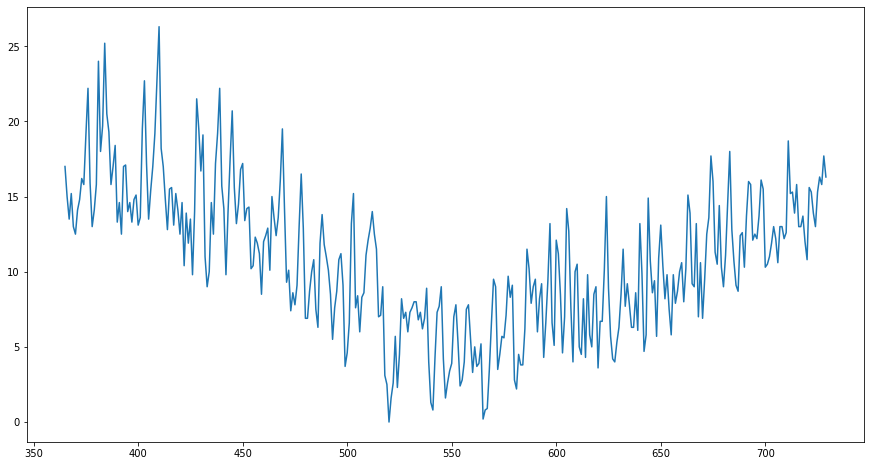

In [8]:
plt.figure(figsize=(15,8))
plt.plot(temp.Temp[365:730])
plt.show()

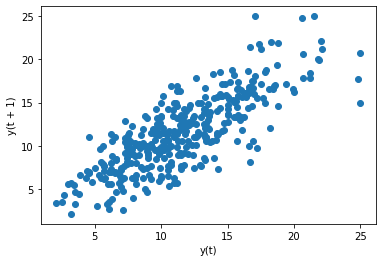

In [9]:
from pandas.plotting import lag_plot
lag_plot(temp.Temp[:365])

In [10]:
temp.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [11]:
val = pd.DataFrame(temp.Temp)
df = pd.concat([val.shift(1), val], axis=1)
df.columns = ['t-1', 't']
df.head(5)

,t-1,t
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [12]:
result = df.corr()
result

,t-1,t
t-1,1.00000,0.77487
t,0.77487,1.00000


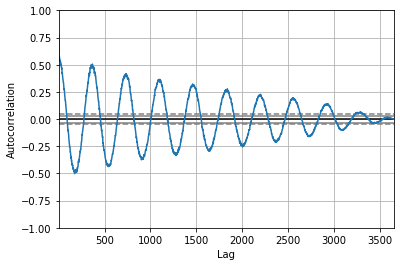

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp.Temp)
plt.show()

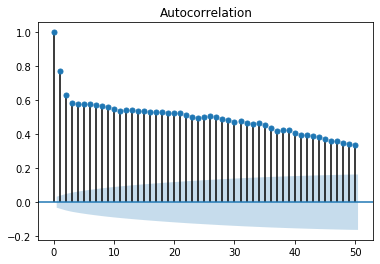

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp.Temp, lags=50)
plt.show()

In [15]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [16]:
# split dataset
X = temp.Temp
train, test = X[1:3635], X[3635:]

In [17]:
# train autoregression
model = AR(train).fit()
print('Lag:  ',model.k_ar)
print('Coefficients: ',model.params)

Lag:   29
Coefficients:  const       0.555832
L1.Temp     0.588875
L2.Temp    -0.091309
L3.Temp     0.048276
L4.Temp     0.040548
L5.Temp     0.039313
L6.Temp     0.026291
L7.Temp     0.045136
L8.Temp     0.012510
L9.Temp     0.037585
L10.Temp   -0.000795
L11.Temp    0.003122
L12.Temp    0.018939
L13.Temp    0.025386
L14.Temp    0.000415
L15.Temp    0.024628
L16.Temp    0.007853
L17.Temp    0.010282
L18.Temp    0.035145
L19.Temp   -0.008880
L20.Temp    0.023961
L21.Temp    0.020247
L22.Temp    0.010853
L23.Temp   -0.017590
L24.Temp   -0.002637
L25.Temp    0.017111
L26.Temp    0.020681
L27.Temp    0.007522
L28.Temp    0.007893
L29.Temp   -0.001838
dtype: float64


C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

In [ ]:
len(train)

In [18]:
# make predictions
#predictions = model.predict(start=len(train), end=len(train)+len(test)-1)
predictions = model.predict(start=3634, end=3648)

error = mean_squared_error(test, predictions)
error

2.8771588378177393

In [19]:
predictions

3635    13.362427
3636    13.239565
3637    13.363124
3638    13.530191
3639    13.673872
3640    13.544209
3641    13.590231
3642    13.772637
3643    13.868134
3644    13.742316
3645    13.710830
3646    13.483002
3647    13.392299
3648    13.432643
3649    13.447945
dtype: float64